In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

In [2]:
path = 'data/database.sqlite'
con = sql.connect(path)

In [289]:
# Let's read all available tables and explore what we got
country = pd.read_sql('select * from Country;',con)
league = pd.read_sql('select * from League;',con)
match = pd.read_sql('select * from Match;',con)
player = pd.read_sql('select * from Player;',con)
player_attributes = pd.read_sql('select * from Player_Attributes;',con)
team = pd.read_sql('select * from Team;',con)
team_attributes = pd.read_sql('select * from Team_Attributes;',con)

In [290]:
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [17]:
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


It appears we can combine Country & League

In [22]:
league_country = league.merge(country, on = 'id')

In [28]:
league_country = league_country.rename(columns = {'name_x' : 'league', 'name_y' : 'country'})

In [34]:
league_country

,country_id,league,country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


The `id` column seems redundant. Let's drop it.

In [32]:
league_country = league_country.drop('id', axis = 1)

In [33]:
league_country

,country_id,league,country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [149]:
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,0


Let's check if the distribution of matches across seasons make sense

In [50]:
match.season.value_counts().iloc[:1]

2008/2009    3326
Name: season, dtype: int64

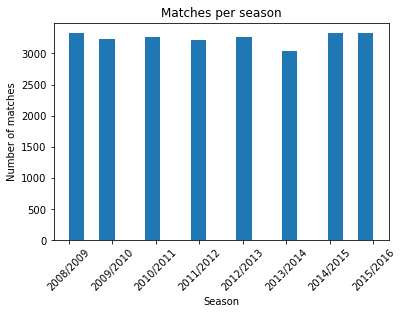

In [64]:
plt.hist(match.season, bins = 20)
plt.xticks(rotation = 45)
plt.title('Matches per season')
plt.xlabel('Season')
plt.ylabel("Number of matches")
plt.show()

Ok, not my best idea as the plot does not really show much but that there is some small differece.
At least the data seems consistent in terms of records per season.

In [65]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


Ok, I guess the info function has some cealing on column number.

In [66]:
match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [77]:
match.iloc[:,71:91]

,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA
0,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20
1,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95
2,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55
3,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80
4,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
25975,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
25976,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
25977,113235.0,41116.0,462608.0,42262.0,92252.0,194532.0,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


I cannot really make much sense for the columns from 11 onwards. Plus it appears there are a lot of missing values in the columns that could be used in an intriguining analysis (e.g. shoton, shotoff, card, foul, cross, corner, possesion).

In [84]:
match = match.iloc[:,:11]

In [85]:
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [88]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


Let's reformat the date 

In [90]:
match.date = pd.to_datetime(match.date)

In [91]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                25979 non-null  int64         
 1   country_id        25979 non-null  int64         
 2   league_id         25979 non-null  int64         
 3   season            25979 non-null  object        
 4   stage             25979 non-null  int64         
 5   date              25979 non-null  datetime64[ns]
 6   match_api_id      25979 non-null  int64         
 7   home_team_api_id  25979 non-null  int64         
 8   away_team_api_id  25979 non-null  int64         
 9   home_team_goal    25979 non-null  int64         
 10  away_team_goal    25979 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 2.2+ MB


The rest of the datatypes make sense.

In [86]:
player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [87]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [92]:
player_attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [95]:
player_attributes[player_attributes.overall_rating > player_attributes.potential]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
377,378,156626,46447,2007-02-22 00:00:00,66.0,65.0,right,None,_0,41.0,...,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0
449,450,52782,38423,2007-08-30 00:00:00,70.0,69.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
450,451,52782,38423,2007-02-22 00:00:00,70.0,69.0,right,None,_0,60.0,...,NaN,47.0,72.0,70.0,NaN,7.0,7.0,62.0,12.0,5.0
1266,1267,112392,25571,2008-08-30 00:00:00,79.0,78.0,right,high,high,73.0,...,83.0,78.0,75.0,84.0,68.0,8.0,22.0,69.0,22.0,22.0
1487,1488,53363,180197,2013-04-05 00:00:00,60.0,59.0,right,medium,medium,25.0,...,25.0,21.0,25.0,25.0,25.0,63.0,58.0,60.0,54.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183570,183571,158293,19696,2007-02-22 00:00:00,72.0,71.0,right,high,high,70.0,...,78.0,67.0,79.0,73.0,60.0,14.0,8.0,45.0,7.0,9.0
183852,183853,157283,39801,2009-08-30 00:00:00,68.0,65.0,right,medium,medium,59.0,...,48.0,64.0,69.0,72.0,63.0,12.0,20.0,63.0,20.0,20.0
183853,183854,157283,39801,2008-08-30 00:00:00,68.0,65.0,right,medium,medium,59.0,...,48.0,64.0,69.0,72.0,63.0,12.0,20.0,63.0,20.0,20.0
183854,183855,157283,39801,2007-08-30 00:00:00,70.0,65.0,right,medium,medium,59.0,...,48.0,64.0,69.0,72.0,63.0,12.0,20.0,63.0,20.0,20.0


In [96]:
team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [121]:
print(f"name is missing on    {team.team_long_name[team.team_long_name.isnull()].count()} records")
print(f"id is missing on      {team.team_long_name[team.team_api_id.isnull()].count()} recods")
print(f"fifa_id is missing on {team.team_long_name[team.team_fifa_api_id.isnull()].count()} records")

name is missing on    0 records
id is missing on      0 recods
fifa_id is missing on 11 records


In [127]:
missing_fifa_id_table = team[team.team_fifa_api_id.isnull()]

In [131]:
missing_fifa_id

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
8,9,7947,NaN,FCV Dender EH,DEN
14,15,4049,NaN,Tubize,TUB
170,26561,6601,NaN,FC Volendam,VOL
204,34816,177361,NaN,Termalica Bruk-Bet Nieciecza,TBN
208,35286,7992,NaN,Trofense,TRO
213,35291,10213,NaN,Amadora,AMA
223,36248,9765,NaN,Portimonense,POR
225,36723,4064,NaN,Feirense,FEI
232,38789,6367,NaN,Uniao da Madeira,MAD
233,38791,188163,NaN,Tondela,TON


In [133]:
team_id_with_missing_fifa_id = np.array(missing_fifa_id.team_api_id)

In [122]:
team_attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


Are any of the teams that are missing fifa_id in the team_attributes table?

In [138]:
team_attributes.team_api_id.isin(team_id_with_missing_fifa_id).any()

False

In [139]:
print(team_attributes.columns)

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')


In [140]:
print(player_attributes.columns)

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')


In [142]:
player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [213]:
player[player.player_name.str.contains('Klaas Jan Huntelaar')]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
5846,5853,36784,Klaas Jan Huntelaar,148803,1983-08-12 00:00:00,185.42,183


In [172]:
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [214]:
best_players = pd.read_excel('data/best_players.xlsx')

In [218]:
best_players.name.to_list()

['Nemanja Vidic',
 'Wayne Rooney',
 'Nemanja Vidic',
 'Vincent Kompany',
 'Gareth Bale',
 'Luis Suarez',
 'Eden Hazard',
 'Jamie Vardy',
 'Mbark Boussoufa',
 'Mbark Boussoufa',
 'Ivan Perisic',
 'Matias Suarez',
 'Carlos Bacca',
 'Thorgan Hazard',
 'Victor Vazquez',
 'Sofiane Hanni',
 'Yoann Gourcuff',
 'Lisandro Lopez',
 'Eden Hazard',
 'Eden Hazard',
 'Zlatan Ibrahimovic',
 'Zlatan Ibrahimovic',
 'Alexandre Lacazette',
 'Zlatan Ibrahimovic',
 'Grafite',
 'Edin Dzeko',
 'Mario Gomez',
 'Klaas Jan Huntelaar',
 'Stefan Kiessling',
 'Robert Lewandowski',
 'Alexander Meier',
 'Robert Lewandowski',
 'Zlatan Ibrahimovic',
 'Diego Milito',
 'Zlatan Ibrahimovic',
 'Andrea Pirlo',
 'Andrea Pirlo',
 'Andrea Pirlo',
 'Carlos Tevez',
 'Leonardo Bonucci',
 'Mounir El Hamdaoui',
 'Luis Suarez',
 'Theo Janssen',
 'Jan Vertonghen',
 'Wilfried Bony',
 'Daley Blind',
 'Georginio Wijnaldum',
 'Davy Klaassen',
 'Bruno Alves',
 'David Luiz',
 'Hulk',
 'Hulk',
 'Nemanja Matic',
 'Enzo Perez',
 'Jonas',
 'J

In [228]:
len(best_players.name.unique())

51

In [219]:
player_best = player[player.player_name.isin(best_players.name.to_list())]

In [230]:
len(player_best.player_name.unique())

51

In [231]:
len(player_best.player_name)

53

2 names more are present

Let's find and remove the extra players from the `player_best` table

In [240]:
duplicate_players = player_best.player_name[player_best.player_name.duplicated()].to_list()

In [241]:
best_players[best_players.name.isin(duplicate_players)]

,season,name,club,champion,league
17,2009–10,Lisandro Lopez,Lyon,0,France Ligue 1
48,2008–09,Bruno Alves,Porto,1,Portugal Liga ZON Sagres


In [242]:
player_best[player_best.player_name.isin(diplicate_players)]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
1406,1409,25920,Bruno Alves,138110,1981-11-27 00:00:00,187.96,183
1407,1410,375782,Bruno Alves,210292,1990-06-09 00:00:00,177.80,165
6177,6184,182456,Lisandro Lopez,215051,1989-09-01 00:00:00,187.96,176
6178,6185,30536,Lisandro Lopez,142707,1983-03-02 00:00:00,175.26,163


Lisandro Lopez, best player for 2009-10 season in Ligue 1 is born in 1983, source: https://en.wikipedia.org/wiki/Lisandro_L%C3%B3pez_(footballer,_born_1983)

Bruno Alves, best player for the 2008-09 season in Portugal Liga ZON Sagres is born in 1981, source:https://en.wikipedia.org/wiki/Bruno_Alves

In [247]:
player_best = player_best.drop(index = [1407, 6177])

In [248]:
player_best

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
451,454,34102,Alexander Frei,20882,1979-07-15 00:00:00,180.34,163
459,462,27478,Alexander Meier,121170,1983-01-17 00:00:00,195.58,212
479,482,169193,Alexandre Lacazette,193301,1991-05-28 00:00:00,175.26,161
703,706,30731,Andrea Pirlo,7763,1979-05-19 00:00:00,177.80,150
865,868,184138,Antoine Griezmann,194765,1991-03-21 00:00:00,175.26,148
1377,1380,527103,Breel Embolo,222357,1997-02-14 00:00:00,185.42,185
1406,1409,25920,Bruno Alves,138110,1981-11-27 00:00:00,187.96,183
1535,1538,166648,Carlos Bacca,207664,1986-09-08 00:00:00,180.34,170
1578,1581,38817,Carlos Tevez,143001,1984-02-05 00:00:00,172.72,157
1992,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176


In [249]:
best_players.merge(player_best, left_on = 'name', right_on = 'player_name')

,season,name,club,champion,league
0,2008–9,Nemanja Vidic,Manchester United,1,England Premier League
1,2009–10,Wayne Rooney,Manchester United,0,England Premier League
2,2010–11,Nemanja Vidic,Manchester United,1,England Premier League
3,2011–12,Vincent Kompany,Manchester City,1,England Premier League
4,2012–13,Gareth Bale,Tottenham Hotspur,0,England Premier League
...,...,...,...,...,...
67,2011–12,Alexander Frei,Basel,1,Switzerland Super League
68,2012–13,Mohamed Salah,Basel,1,Switzerland Super League
69,2013–14,Shkelzen Gashi,Grasshoppers,0,Switzerland Super League
70,2014–15,Breel Embolo,Basel,1,Switzerland Super League


In [250]:
best_players.merge(player_best, left_on = 'name', right_on = 'player_name')

,season,name,club,champion,league,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,2008–9,Nemanja Vidic,Manchester United,1,England Premier League,7846,30865,Nemanja Vidic,140601,1981-10-21 00:00:00,190.50,194
1,2010–11,Nemanja Vidic,Manchester United,1,England Premier League,7846,30865,Nemanja Vidic,140601,1981-10-21 00:00:00,190.50,194
2,2009–10,Wayne Rooney,Manchester United,0,England Premier League,10749,30829,Wayne Rooney,54050,1985-10-24 00:00:00,175.26,183
3,2011–12,Vincent Kompany,Manchester City,1,England Premier League,10645,39027,Vincent Kompany,139720,1986-04-10 00:00:00,193.04,187
4,2012–13,Gareth Bale,Tottenham Hotspur,0,England Premier League,3660,31921,Gareth Bale,173731,1989-07-16 00:00:00,182.88,163
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2011–12,Alexander Frei,Basel,1,Switzerland Super League,454,34102,Alexander Frei,20882,1979-07-15 00:00:00,180.34,163
68,2012–13,Mohamed Salah,Basel,1,Switzerland Super League,7665,292462,Mohamed Salah,209331,1992-06-15 00:00:00,175.26,159
69,2013–14,Shkelzen Gashi,Grasshoppers,0,Switzerland Super League,9751,41726,Shkelzen Gashi,177673,1988-07-15 00:00:00,182.88,165
70,2014–15,Breel Embolo,Basel,1,Switzerland Super League,1380,527103,Breel Embolo,222357,1997-02-14 00:00:00,185.42,185


In [251]:
best_players = best_players.merge(player_best, left_on = 'name', right_on = 'player_name')

In [259]:
best_players.set_index('id')[['player_api_id', 
                              'player_fifa_api_id', 
                              'name', 'season', 
                              'birthday', 'height', 
                              'weight', 'league', 
                              'champion']]

,player_api_id,player_fifa_api_id,name,season,birthday,height,weight,league,champion
id,,,,,,,,,
7846,30865,140601,Nemanja Vidic,2008–9,1981-10-21 00:00:00,190.50,194,England Premier League,1
7846,30865,140601,Nemanja Vidic,2010–11,1981-10-21 00:00:00,190.50,194,England Premier League,1
10749,30829,54050,Wayne Rooney,2009–10,1985-10-24 00:00:00,175.26,183,England Premier League,0
10645,39027,139720,Vincent Kompany,2011–12,1986-04-10 00:00:00,193.04,187,England Premier League,1
3660,31921,173731,Gareth Bale,2012–13,1989-07-16 00:00:00,182.88,163,England Premier League,0
...,...,...,...,...,...,...,...,...,...
454,34102,20882,Alexander Frei,2011–12,1979-07-15 00:00:00,180.34,163,Switzerland Super League,1
7665,292462,209331,Mohamed Salah,2012–13,1992-06-15 00:00:00,175.26,159,Switzerland Super League,1
9751,41726,177673,Shkelzen Gashi,2013–14,1988-07-15 00:00:00,182.88,165,Switzerland Super League,0


In [260]:
best_players = best_players.set_index('id')[['player_api_id', 
                              'player_fifa_api_id', 
                              'name', 'season', 
                              'birthday', 'height', 
                              'weight', 'league', 
                              'champion']]

In [263]:
best_players = best_players.merge(player_attributes, left_on = 'id', right_on = 'id')

In [292]:
best_players.season.unique()

array(['2008–9', '2010–11', '2009–10', '2011–12', '2012–13', '2013–14',
       '2014–15', '2015–16', '2008–09'], dtype=object)

In [273]:
player_attributes[player_attributes.player_fifa_api_id.isin(best_players.player_fifa_api_id_x.to_list())]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
7693,7694,20882,34102,2013-04-19 00:00:00,77.0,77.0,right,high,medium,64.0,...,76.0,88.0,23.0,38.0,20.0,11.0,14.0,11.0,11.0,10.0
7694,7695,20882,34102,2013-02-15 00:00:00,77.0,77.0,right,high,medium,64.0,...,76.0,88.0,23.0,38.0,20.0,11.0,14.0,11.0,11.0,10.0
7695,7696,20882,34102,2012-08-31 00:00:00,77.0,77.0,right,high,medium,64.0,...,76.0,93.0,23.0,38.0,20.0,11.0,14.0,11.0,11.0,10.0
7696,7697,20882,34102,2012-02-22 00:00:00,78.0,78.0,right,high,medium,64.0,...,76.0,93.0,24.0,39.0,21.0,11.0,14.0,11.0,11.0,10.0
7697,7698,20882,34102,2011-08-30 00:00:00,77.0,77.0,right,medium,medium,62.0,...,72.0,86.0,24.0,39.0,21.0,11.0,14.0,11.0,11.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183688,183689,41236,35724,2009-02-22 00:00:00,89.0,94.0,right,medium,low,68.0,...,80.0,91.0,24.0,69.0,28.0,12.0,24.0,65.0,24.0,24.0
183689,183690,41236,35724,2008-08-30 00:00:00,89.0,94.0,right,medium,low,68.0,...,80.0,91.0,24.0,69.0,28.0,12.0,24.0,65.0,24.0,24.0
183690,183691,41236,35724,2008-02-22 00:00:00,87.0,91.0,right,medium,low,57.0,...,80.0,72.0,24.0,21.0,28.0,12.0,24.0,36.0,24.0,24.0
183691,183692,41236,35724,2007-08-30 00:00:00,87.0,91.0,right,medium,low,57.0,...,80.0,72.0,24.0,21.0,28.0,12.0,24.0,36.0,24.0,24.0


There should be data across time for each player

In [279]:
player_attributes[player_attributes.player_api_id == 34102]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
7693,7694,20882,34102,2013-04-19 00:00:00,77.0,77.0,right,high,medium,64.0,...,76.0,88.0,23.0,38.0,20.0,11.0,14.0,11.0,11.0,10.0
7694,7695,20882,34102,2013-02-15 00:00:00,77.0,77.0,right,high,medium,64.0,...,76.0,88.0,23.0,38.0,20.0,11.0,14.0,11.0,11.0,10.0
7695,7696,20882,34102,2012-08-31 00:00:00,77.0,77.0,right,high,medium,64.0,...,76.0,93.0,23.0,38.0,20.0,11.0,14.0,11.0,11.0,10.0
7696,7697,20882,34102,2012-02-22 00:00:00,78.0,78.0,right,high,medium,64.0,...,76.0,93.0,24.0,39.0,21.0,11.0,14.0,11.0,11.0,10.0
7697,7698,20882,34102,2011-08-30 00:00:00,77.0,77.0,right,medium,medium,62.0,...,72.0,86.0,24.0,39.0,21.0,11.0,14.0,11.0,11.0,10.0
7698,7699,20882,34102,2010-08-30 00:00:00,77.0,82.0,right,medium,medium,64.0,...,69.0,91.0,23.0,31.0,20.0,11.0,14.0,11.0,11.0,10.0
7699,7700,20882,34102,2009-08-30 00:00:00,77.0,82.0,right,medium,medium,64.0,...,69.0,82.0,23.0,31.0,20.0,4.0,21.0,45.0,21.0,21.0
7700,7701,20882,34102,2008-08-30 00:00:00,81.0,84.0,right,medium,medium,67.0,...,69.0,83.0,21.0,21.0,20.0,4.0,21.0,31.0,21.0,21.0
7701,7702,20882,34102,2007-08-30 00:00:00,81.0,86.0,right,medium,medium,64.0,...,69.0,83.0,21.0,21.0,20.0,4.0,21.0,31.0,21.0,21.0
7702,7703,20882,34102,2007-02-22 00:00:00,81.0,88.0,right,medium,medium,62.0,...,69.0,80.0,17.0,16.0,20.0,4.0,6.0,31.0,9.0,10.0


In [282]:
player_attributes[player_attributes.player_fifa_api_id == 20882].sort_values('date')

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
7702,7703,20882,34102,2007-02-22 00:00:00,81.0,88.0,right,medium,medium,62.0,...,69.0,80.0,17.0,16.0,20.0,4.0,6.0,31.0,9.0,10.0
7701,7702,20882,34102,2007-08-30 00:00:00,81.0,86.0,right,medium,medium,64.0,...,69.0,83.0,21.0,21.0,20.0,4.0,21.0,31.0,21.0,21.0
7700,7701,20882,34102,2008-08-30 00:00:00,81.0,84.0,right,medium,medium,67.0,...,69.0,83.0,21.0,21.0,20.0,4.0,21.0,31.0,21.0,21.0
7699,7700,20882,34102,2009-08-30 00:00:00,77.0,82.0,right,medium,medium,64.0,...,69.0,82.0,23.0,31.0,20.0,4.0,21.0,45.0,21.0,21.0
7698,7699,20882,34102,2010-08-30 00:00:00,77.0,82.0,right,medium,medium,64.0,...,69.0,91.0,23.0,31.0,20.0,11.0,14.0,11.0,11.0,10.0
7697,7698,20882,34102,2011-08-30 00:00:00,77.0,77.0,right,medium,medium,62.0,...,72.0,86.0,24.0,39.0,21.0,11.0,14.0,11.0,11.0,10.0
7696,7697,20882,34102,2012-02-22 00:00:00,78.0,78.0,right,high,medium,64.0,...,76.0,93.0,24.0,39.0,21.0,11.0,14.0,11.0,11.0,10.0
7695,7696,20882,34102,2012-08-31 00:00:00,77.0,77.0,right,high,medium,64.0,...,76.0,93.0,23.0,38.0,20.0,11.0,14.0,11.0,11.0,10.0
7694,7695,20882,34102,2013-02-15 00:00:00,77.0,77.0,right,high,medium,64.0,...,76.0,88.0,23.0,38.0,20.0,11.0,14.0,11.0,11.0,10.0
7693,7694,20882,34102,2013-04-19 00:00:00,77.0,77.0,right,high,medium,64.0,...,76.0,88.0,23.0,38.0,20.0,11.0,14.0,11.0,11.0,10.0


In [285]:
player_attributes.date = pd.to_datetime(player_attributes.date)

In [287]:
player_attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [288]:
best_players

,id,player_api_id_x,player_fifa_api_id_x,name,season,birthday,height,weight,league,champion,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,7846,30865,140601,Nemanja Vidic,2008–9,1981-10-21 00:00:00,190.50,194,England Premier League,1,...,78.0,81.0,42.0,55.0,46.0,15.0,5.0,5.0,10.0,8.0
1,7846,30865,140601,Nemanja Vidic,2010–11,1981-10-21 00:00:00,190.50,194,England Premier League,1,...,78.0,81.0,42.0,55.0,46.0,15.0,5.0,5.0,10.0,8.0
2,10749,30829,54050,Wayne Rooney,2009–10,1985-10-24 00:00:00,175.26,183,England Premier League,0,...,72.0,78.0,53.0,61.0,70.0,9.0,5.0,11.0,6.0,14.0
3,10645,39027,139720,Vincent Kompany,2011–12,1986-04-10 00:00:00,193.04,187,England Premier League,1,...,66.0,57.0,58.0,62.0,56.0,14.0,10.0,15.0,9.0,9.0
4,3660,31921,173731,Gareth Bale,2012–13,1989-07-16 00:00:00,182.88,163,England Premier League,0,...,70.0,58.0,65.0,68.0,66.0,13.0,6.0,8.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,454,34102,20882,Alexander Frei,2011–12,1979-07-15 00:00:00,180.34,163,Switzerland Super League,1,...,66.0,62.0,30.0,34.0,36.0,11.0,20.0,27.0,20.0,20.0
68,7665,292462,209331,Mohamed Salah,2012–13,1992-06-15 00:00:00,175.26,159,Switzerland Super League,1,...,77.0,63.0,25.0,35.0,28.0,13.0,25.0,42.0,25.0,25.0
69,9751,41726,177673,Shkelzen Gashi,2013–14,1988-07-15 00:00:00,182.88,165,Switzerland Super League,0,...,51.0,58.0,25.0,25.0,24.0,5.0,6.0,12.0,9.0,6.0
70,1380,527103,222357,Breel Embolo,2014–15,1997-02-14 00:00:00,185.42,185,Switzerland Super League,1,...,58.0,57.0,68.0,72.0,70.0,11.0,15.0,15.0,8.0,10.0
